# **KMeans Clustering**

## **Importing Labararies**

In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

## **Data Overview**

In [188]:
df = pd.read_csv('mushroom_cleaned.csv')
df.head()

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
0,1372,2,2,10,3.807467,1545,11,1.804273,1
1,1461,2,2,10,3.807467,1557,11,1.804273,1
2,1371,2,2,10,3.612496,1566,11,1.804273,1
3,1261,6,2,10,3.787572,1566,11,1.804273,1
4,1305,6,2,10,3.711971,1464,11,0.943195,1


In [189]:
df.shape

(54035, 9)

In [190]:
df.columns

Index(['cap-diameter', 'cap-shape', 'gill-attachment', 'gill-color',
       'stem-height', 'stem-width', 'stem-color', 'season', 'class'],
      dtype='object')

In [191]:
df.isnull().sum()

cap-diameter       0
cap-shape          0
gill-attachment    0
gill-color         0
stem-height        0
stem-width         0
stem-color         0
season             0
class              0
dtype: int64

In [192]:
df.describe(include='all')

,cap-diameter,cap-shape,gill-attachment,gill-color,stem-height,stem-width,stem-color,season,class
count,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000,54035.000000
mean,567.257204,4.000315,2.142056,7.329509,0.759110,1051.081299,8.418062,0.952163,0.549181
std,359.883763,2.160505,2.228821,3.200266,0.650969,782.056076,3.262078,0.305594,0.497580
min,0.000000,0.000000,0.000000,0.000000,0.000426,0.000000,0.000000,0.027372,0.000000
25%,289.000000,2.000000,0.000000,5.000000,0.270997,421.000000,6.000000,0.888450,0.000000
50%,525.000000,5.000000,1.000000,8.000000,0.593295,923.000000,11.000000,0.943195,1.000000
75%,781.000000,6.000000,4.000000,10.000000,1.054858,1523.000000,11.000000,0.943195,1.000000
max,1891.000000,6.000000,6.000000,11.000000,3.835320,3569.000000,12.000000,1.804273,1.000000


In [193]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54035 entries, 0 to 54034
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   cap-diameter     54035 non-null  int64  
 1   cap-shape        54035 non-null  int64  
 2   gill-attachment  54035 non-null  int64  
 3   gill-color       54035 non-null  int64  
 4   stem-height      54035 non-null  float64
 5   stem-width       54035 non-null  int64  
 6   stem-color       54035 non-null  int64  
 7   season           54035 non-null  float64
 8   class            54035 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 3.7 MB


In [194]:
df['class'].value_counts()

class
1    29675
0    24360
Name: count, dtype: int64

## **Feature Engineering**

In [195]:
X = df.drop(columns='class')
y = df['class']

In [196]:
numerical_columns = [0, 1, 2, 3, 4, 5, 6, 7]

In [197]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [198]:
handle_numerical = Pipeline(steps=[
    ('scale', MinMaxScaler()),
    ('clustering', KMeans(n_clusters=3 ,n_init=10, random_state=42))
])

In [199]:
preprocessing = ColumnTransformer(transformers=[
    ('preprocessing', handle_numerical, numerical_columns)
], remainder='passthrough')

In [200]:
model = RandomForestClassifier()

In [201]:
pipe = make_pipeline(preprocessing, model)

In [202]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('preprocessing',
                                                  Pipeline(steps=[('scale',
                                                                   MinMaxScaler()),
                                                                  ('clustering',
                                                                   KMeans(n_clusters=3,
                                                                          n_init=10,
                                                                          random_state=42))]),
                                                  [0, 1, 2, 3, 4, 5, 6, 7])])),
                ('randomforestclassifier', RandomForestClassifier())])

In [203]:
y_pred = pipe.predict(X_test)

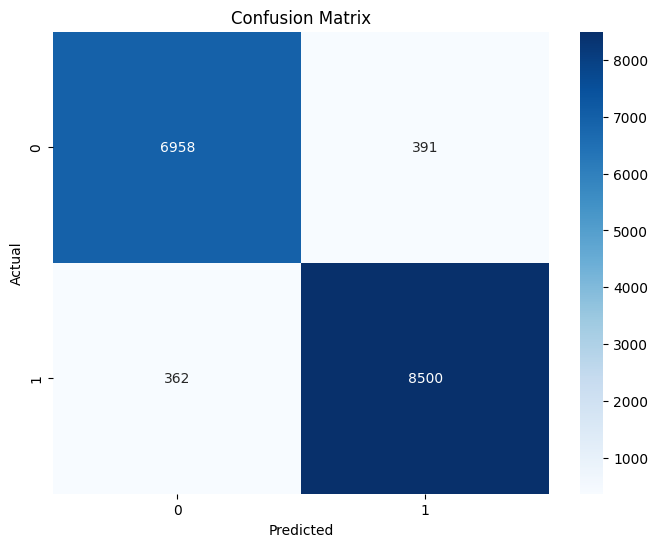

In [204]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=True, yticklabels=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [205]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      7349
           1       0.96      0.96      0.96      8862

    accuracy                           0.95     16211
   macro avg       0.95      0.95      0.95     16211
weighted avg       0.95      0.95      0.95     16211

